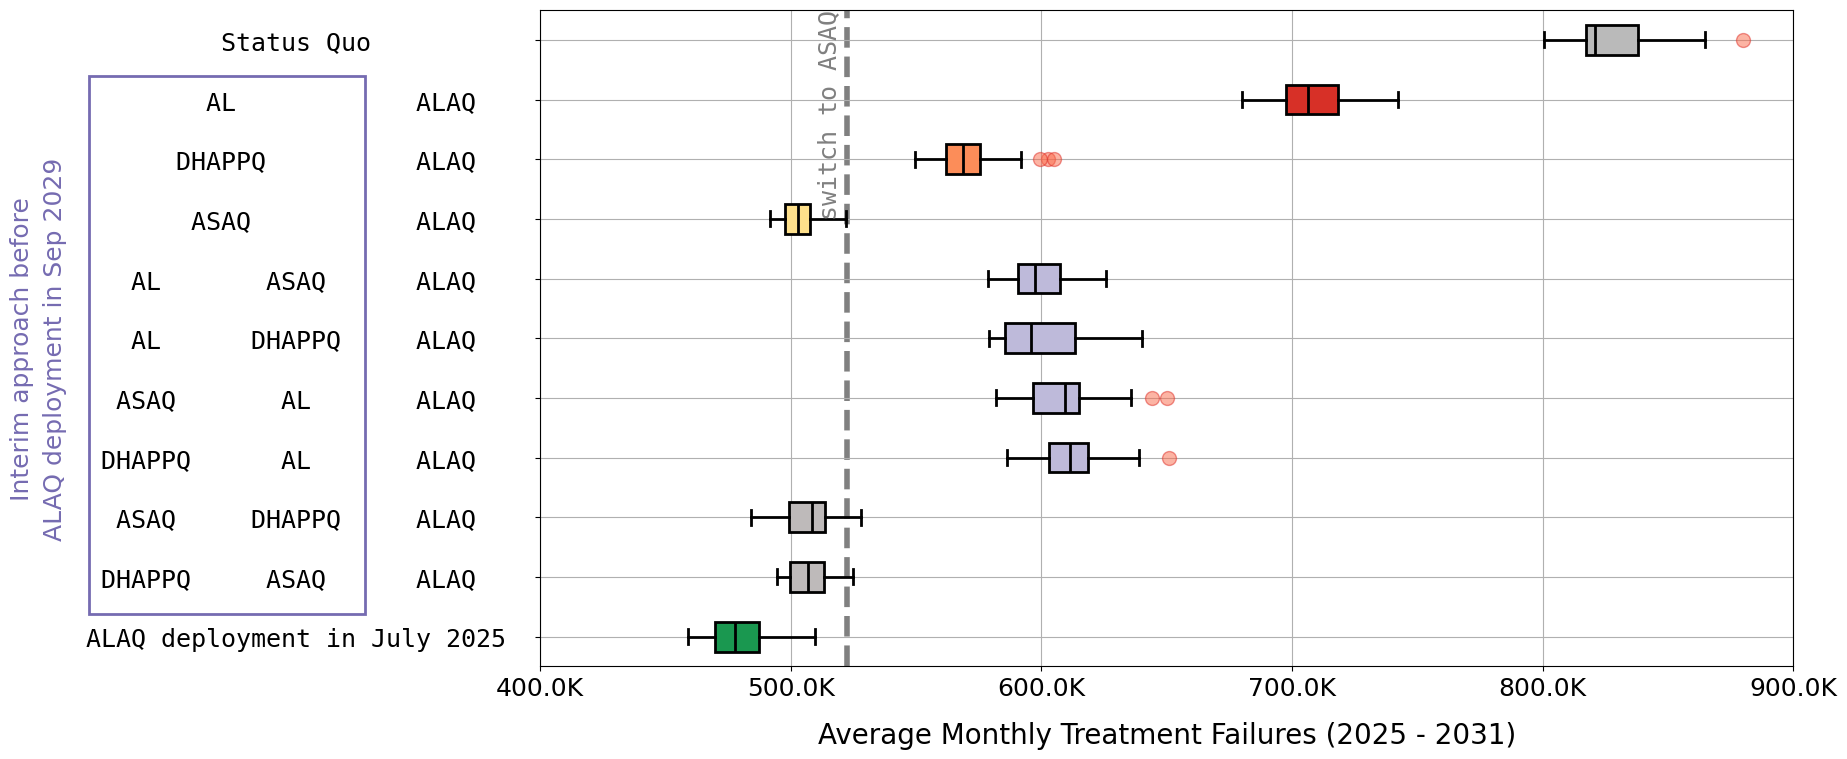

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyArrowPatch


# Custom formatter function for x-axis
def millions_formatter(x, pos):
    return f'{int(x) / 1e6}M'

# Custom formatter function for x-axis
def thousands_formatter(x, pos):
    return f'{int(x) / 1e3}K'
#setting
corrected_scenario_mapping_dict = {
    "status_quo": {"label": "Status Quo (AL 3 days)", "color": "#bababa", "position": 0},
    "tact_al4y_alaq": {"label": "Status quo (4 years), then ALAQ", "color": "#d73027", "position": 0},
    "tact_dhappq4y_alaq": {"label": "DHAPPQ (4 years), then ALAQ", "color": "#fc8d59", "position": 0},
    "tact_asaq4y_alaq": {"label": "ASAQ (4 years), then ALAQ", "color": "#fee08b", "position": 0},
    "tact_al_asaq_alaq": {"label": "Triple-ACT: AL (2 years), ASAQ (2 years), then ALAQ", "color": "#bebada", "position": 0},
    "tact_al_dhappq_alaq": {"label": "Triple-ACT: AL (2 years), DHAPPQ (2 years), then ALAQ", "color": "#bebada", "position": 0},
    "tact_asaq_al_alaq": {"label": "Triple-ACT: ASAQ (2 years), AL (2 years), then ALAQ", "color": "#bebada", "position": 0},
    "tact_dhappq_al_alaq": {"label": "Triple-ACT: DHAPPQ (2 years), AL (2 years), then ALAQ", "color": "#bebada", "position": 0},
    "tact_asaq_dhappq_alaq": {"label": "ASAQ (2 years), DHAPPQ (2 years), then ALAQ", "color": "#bebaba", "position": 0},
    "tact_dhappq_asaq_alaq": {"label": "DHAPPQ (2 years), ASAQ (2 years), then ALAQ", "color": "#bebaba", "position": 0},
    "tact_alaq": {"label": "ALAQ deployment in Sept 2024", "color": "#1a9850", "position": 0},
}
for i, key in enumerate(corrected_scenario_mapping_dict):
    corrected_scenario_mapping_dict[key]['position'] = -i
group_endings = ["mac_dhppq_al_789"] 

total_width = 30
col_width_3 = total_width // 3  # Width for each column in 3-column rows

# Extract labels from the dictionary, split by "-" and format them
y_ticks_dynamic = [
    f"{'Status Quo':^{total_width}}",
    f"{'AL':^{total_width*2//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'DHAPPQ':^{total_width*2//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'ASAQ':^{total_width*2//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'AL':^{total_width*1//3}}{'ASAQ':^{total_width*1//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'AL':^{total_width*1//3}}{'DHAPPQ':^{total_width*1//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'ASAQ':^{total_width*1//3}}{'AL':^{total_width*1//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'DHAPPQ':^{total_width*1//3}}{'AL':^{total_width*1//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'ASAQ':^{total_width*1//3}}{'DHAPPQ':^{total_width*1//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'DHAPPQ':^{total_width*1//3}}{'ASAQ':^{total_width*1//3}}{'ALAQ':^{total_width*1//3}}",
    f"{'ALAQ deployment in July 2025':^{total_width}}",
]


# Load the dataset
data_path = './data/ntfs_6y.csv'
data_labeled = pd.read_csv(data_path)
data_labeled = data_labeled [ (data_labeled["scenario"].isin(corrected_scenario_mapping_dict.keys())) & (data_labeled["year"] == 2031)]
data_labeled["total_treatmentfailures"] = data_labeled["total_treatmentfailures"] / (6*12)

data_labeled['position'] = data_labeled['scenario'].apply(lambda x: corrected_scenario_mapping_dict[x]['position'])

# Introduce variables for box width and spacing
box_width = 0.2  # Can be adjusted for narrower or wider boxes
spacing_multiplier = 0.4  # Adjust this to make boxplots closer or further apart
dynamic_positions = {scenario: details["position"] * spacing_multiplier for scenario, details in corrected_scenario_mapping_dict.items()}

# Calculate dynamic positions for dashed lines
adjusted_group_separators = [dynamic_positions[scenario] - 0.5 * spacing_multiplier for scenario in group_endings[:-1]]  # Adjust, exclude last

plt.rcdefaults()
plt.rcParams['font.size'] = 18
lw=2
outlier_size=10
# Create the plots with corrected positions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8), sharey=False, sharex=False)
# box_plot_for_a_year(axes, data_labeled, 2029, dynamic_positions, adjusted_group_separators, is_first_column=True)
for scenario, details in corrected_scenario_mapping_dict.items():
    scenario_data = data_labeled[(data_labeled['scenario'] == scenario) & (data_labeled['year'] == 2031)]['total_treatmentfailures']
    if not scenario_data.empty:
        ax.boxplot(scenario_data, positions=[dynamic_positions[scenario]], 
                    widths=box_width, vert=False, patch_artist=True,
                    boxprops=dict(facecolor=details['color'], color='black',  linewidth=lw),
                    whiskerprops=dict(color='black',linewidth=lw),
                    capprops=dict(color='black', linewidth=lw),
                    medianprops=dict(color='black', linewidth=lw),
                    flierprops=dict(marker='o', markerfacecolor='#fb6a4a',markeredgecolor='#de2d26', alpha=0.5,markersize=outlier_size)
                    )
# Set tick positions and custom labels
ax.set_yticks(list(dynamic_positions.values()))
ax.set_yticklabels(y_ticks_dynamic, fontname='monospace') 

# Adjust tick parameters for better padding
ax.tick_params(axis='y', pad=10)

        
ax.axvline(
    x=522456,  # Line position
    c="grey",  # Line color
    linewidth=4,  # Line thickness
    linestyle = '--',
    zorder=0,  # Ensure it renders behind the bars
    clip_on=True,  # Allow line to extend beyond axes
)

ax.text(
    520000,  # Position on the x-axis
    -0.5,  # Position on the y-axis
    "switch to ASAQ",
    fontweight="normal",
    fontname='monospace',
    fontsize = 18,
    color="grey",
    rotation=90,
    va="center",
    ha="right",
)


# Add the text
ax.text(-0.4, 0.2, 'Interim approach before\nALAQ deployment in Sep 2029',
        transform=ax.transAxes,
        zorder=101, 
        clip_on=False, 
        rotation= 90, horizontalalignment='center',
        linespacing=1.5,
        color = '#756bb1'
        )
# ## rectangle annotation
rect = Rectangle((-0.36, 0.08), 0.22, 0.82, 
                transform=ax.transAxes,
                 linewidth=2, 
                 edgecolor='#756bb1', facecolor='none',
                 zorder=100,
                 clip_on=False)
ax.add_patch(rect)

ax.set_xlim(400000, 900000)

min_y = min(dynamic_positions.values()) - 0.5 * spacing_multiplier
max_y = max(dynamic_positions.values()) + 0.5 * spacing_multiplier
ax.set_ylim(min_y, max_y)
# ax.set_yticklabels([details["label"] for scenario, details in corrected_scenario_mapping_dict.items()])
ax.set_xlabel('Average Monthly Treatment Failures (2025 - 2031)', fontsize=20, labelpad=15)
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))  # Apply the custom formatter
ax.grid(axis='both')

plt.tight_layout()
plt.savefig(f"figure_9.png", dpi=300)